In [0]:
!pip install -q geopandas
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Use df_final data before featuring ( Line 13 of cleaning file - Transform variables to construct feature)**

In [0]:
df = pd.read_csv("df.csv")
boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))

In [0]:
# drop $ and convert price to float
df['price']= df['price'].astype(str).str.replace('$','')
df['price']= df['price'].str.replace(',','')
df['price'] = df['price'].astype(float)
df = df[df.price != 0]

In [155]:
# find the average price each neighbourhood group
fdf = df.groupby("neighbourhood_group_cleansed")['price'].mean().reset_index()
# sort_values() does not change the index of the rows, reset_index() is used to fix this 
Boros = boros.sort_values(by=['BoroName'], ascending = True).reset_index()
fdf.price = round(fdf.price)
fdf

,neighbourhood_group_cleansed,price
0,Bronx,86.0
1,Brooklyn,129.0
2,Manhattan,195.0
3,Queens,100.0
4,Staten Island,91.0


In [0]:
Boros["price"] = fdf["price"]

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


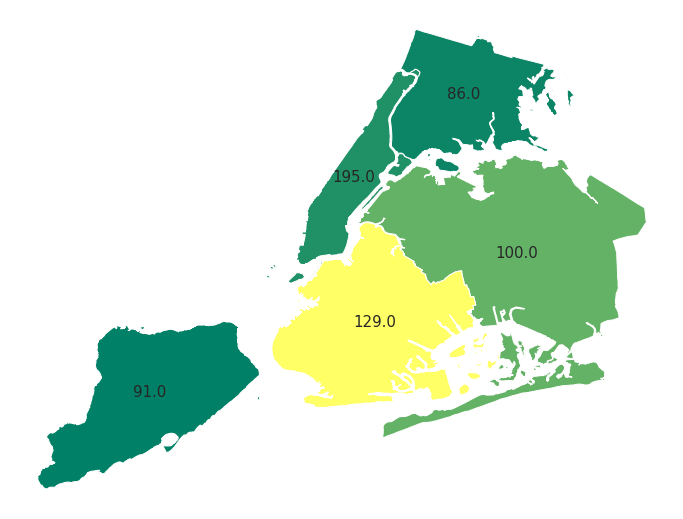

In [157]:
# create a geodataframe containing centroids of the boroughs
centroid_coords = geopandas.GeoDataFrame(
                          pd.DataFrame({'BoroName': Boros.BoroName}), 
                          geometry=geopandas.points_from_xy(
                              Boros["geometry"].centroid.x, 
                              Boros["geometry"].centroid.y
                          )
                  )
# set the coordinate system of centroid_coords to the same as of boros
centroid_coords.crs = Boros.crs
# add the price to display for each borough
centroid_coords["price"] = Boros.price
# plot the boroughs
fig, ax = plt.subplots(1, 1, figsize=(12,12))
my_plot = boros.to_crs({"init": "epsg:4326"}).plot(column=centroid_coords.price, 
                                                   cmap="summer", ax=ax)
ax.set_axis_off()
# plot the text for each borough
for idx, row in centroid_coords.to_crs({"init": "epsg:4326"}).iterrows():
    plt.annotate(s= row["price"], 
                 xy=(row['geometry'].x, row['geometry'].y),
                 horizontalalignment='center', fontsize=15)
plt.savefig('Average price Per Borough_read.png')

In [159]:
# find the total Airbnb listings each neighbourhood group
gdf = df.groupby("neighbourhood_group_cleansed")['id'].count().reset_index() 
gdf

,neighbourhood_group_cleansed,id
0,Bronx,2080
1,Brooklyn,33925
2,Manhattan,33876
3,Queens,10423
4,Staten Island,837


In [0]:
Boros["listings"] = gdf["id"]

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


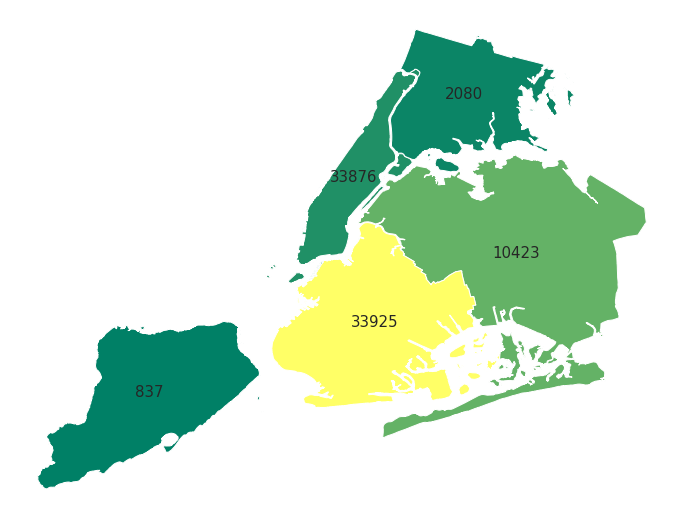

In [161]:
# add the listings to display for each borough 
centroid_coords["listings"] = Boros.listings
# plot the boroughs
fig, ax = plt.subplots(1, 1, figsize=(12,12))
my_plot = boros.to_crs({"init": "epsg:4326"}).plot(column=centroid_coords.price, 
                                                   cmap="summer", ax=ax)
ax.set_axis_off()
# plot the text for each borough
for idx, row in centroid_coords.to_crs({"init": "epsg:4326"}).iterrows():
    plt.annotate(s= row["listings"], 
                 xy=(row['geometry'].x, row['geometry'].y),
                 horizontalalignment='center', fontsize=15)
plt.savefig('Total listings Per Borough_read.png')

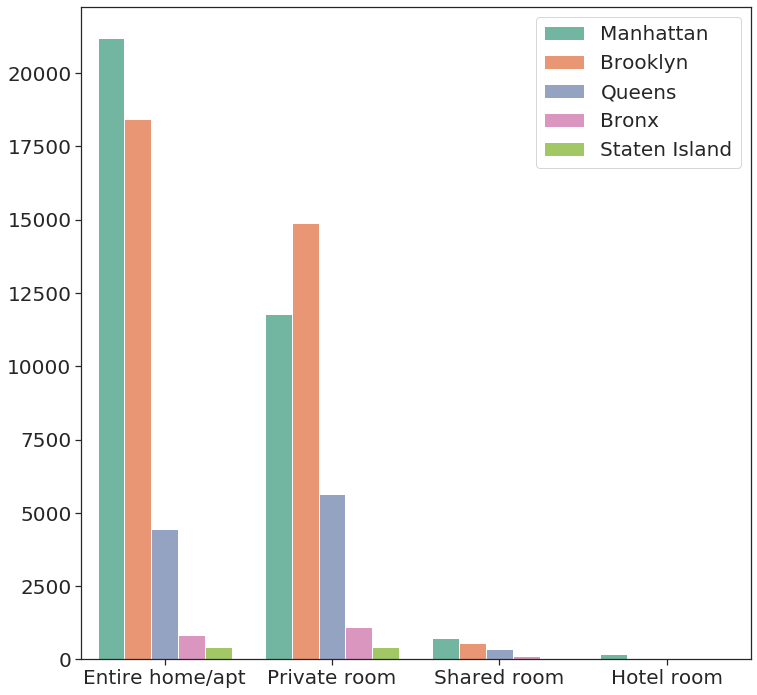

In [162]:
#create count plot for room types
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12,12))
sns.set(style="ticks")
sns.countplot(x='room_type', hue="neighbourhood_group_cleansed", data=df, ax=ax, palette="Set2")
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('', fontsize = 20)
plt.ylabel('', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('Room Types Per Borough_read.png')